# Surface de réponse

Les surfaces de réponses sont un type de modèle particulier pour lequel nous avons un modèle prédictif de la forme suivante:
$$F(X)= 10^{p(X)}$$
Avec :
$$p(X)={\sum_{i=0}^{degree}({a_i\prod_{j=0}^{degree}{X_j})}}$$

Protocole : 

0. Récupération des données d'entrainement
0. Entrainement :
    1. Séparation du set d'entrainement et de test
    1. Passage à l'espace logarithmique
    1. Normalisation éventuelle
    1. Creation du modèle
    1. Entrainement du modèle
0. Prediction :
    1. Passage à l'espace logarithmique
    1. Normalisation éventuelle
    1. Prédiction
    1. Dénormalisation éventuelle
    1. Passage à l'espace naturel


1. Récupération des données d'entrainement

In [3]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import sklearn
try:
    import seaborn as sns
    sns.set_style('dark')
except ImportError:
    print("On utilise seulement matplotlib")

In [4]:
# =================================================
# PARAMETRES DU MODELE
XMIN = 1.
XMAX = 10.
NB_PTS = 500
RANDOM_WEIGHT = 0.02
DEGREE = 2
SIZE = (15,10) # plot size
# =================================================

x = np.linspace(XMIN,XMAX,NB_PTS).reshape(-1,1)
# On crée les variables dépendantes
# Elles vont correspondre à un polynome de second ordre avec du bruit
y = 10**(x + RANDOM_WEIGHT*np.random.random(x.shape))


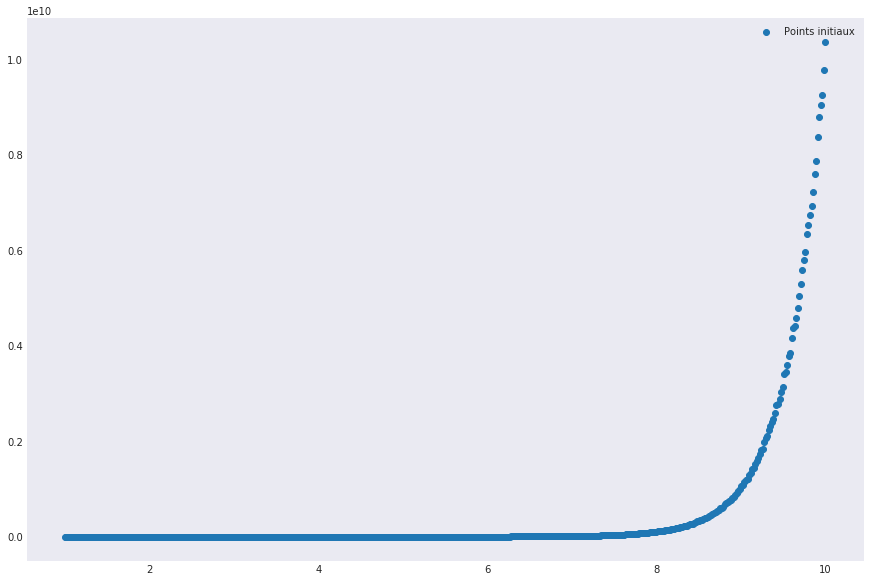

In [5]:
# Affichage des données
fig = plt.figure(figsize=SIZE)

plt.scatter(x,y,label="Points initiaux")
plt.legend()
plt.show()

## Creation du modèle

In [6]:
# Il faut dabord passer sur l'espace logarithmique pour le vecteur de sortie
y_log = np.log10(y)

# Il faut tout d'abord créer un modèle permettant de convertir le vecteur d'entrée, en vecteur polynomial
from sklearn.preprocessing import PolynomialFeatures

poly_feat = PolynomialFeatures(degree=DEGREE, include_bias=False)
x_poly = poly_feat.fit_transform(x)

In [7]:
# Construction du modèle sur l'espace logarithmique
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_poly,y_log)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

## Affichage du résultat

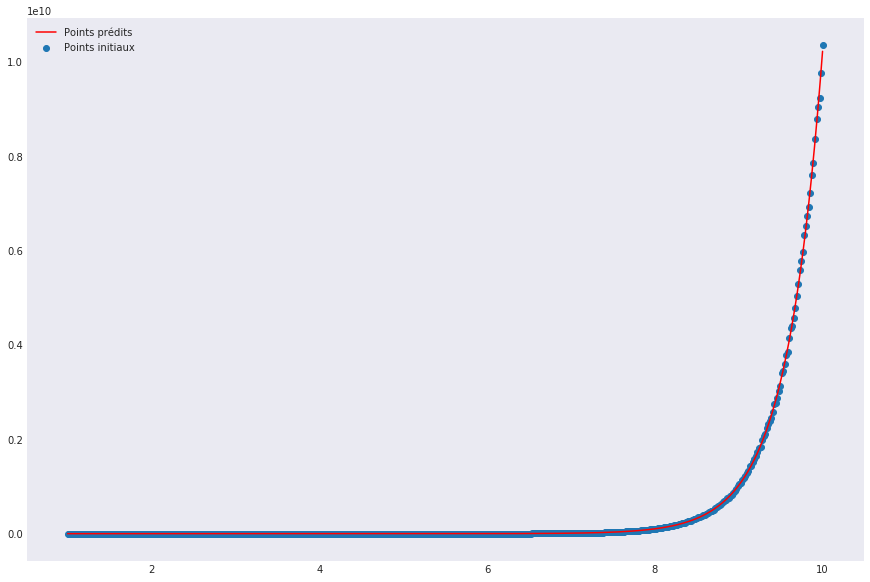

In [8]:
x_grid = np.linspace(XMIN,XMAX,NB_PTS*10).reshape(-1,1)
x_grid_poly = poly_feat.transform(x_grid)
y_pred = model.predict(x_grid_poly)
# Apres la prediction il faut repasser sur l'espace naturel
y_pred = 10**(y_pred)

fig = plt.figure(figsize=SIZE)

plt.plot(x_grid,y_pred,label="Points prédits",color="r")
plt.scatter(x,y,label="Points initiaux")
plt.legend()
plt.show()

# [Retour au sommaire de la partie](modeles_presentation.ipynb)